# Analisis Sentimen Mahasiswa UGM Terhadap Kebijakan Uang Pangkal

## Initializations

In [101]:
# utilities
import re
import demoji

import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/nara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Acquisition

In [103]:
# Importing the dataset
DATASET_COLUMNS  = ["label", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
train_df = pd.read_csv('./train_preprocess.csv',
    encoding=DATASET_ENCODING)
test_df = pd.read_csv('./test.csv')

In [104]:
# Sample data
labels = train_df.label.values

# Mapping function
def group_label(label):
    if label in ['happy']:
        return 'positive'
    elif label in ['anger', 'fear', 'sadness']:
        return 'negative'
    else:
        return 'neutral'

# Applying the mapping function to the labels
grouped_labels = [group_label(label) for label in labels]

# apply the grouped labels to the 
train_df['label'] = grouped_labels

In [105]:
X_train = train_df.tweet
y_train = train_df.label
X_test = test_df.tweet
y_test = test_df.label

<AxesSubplot:>

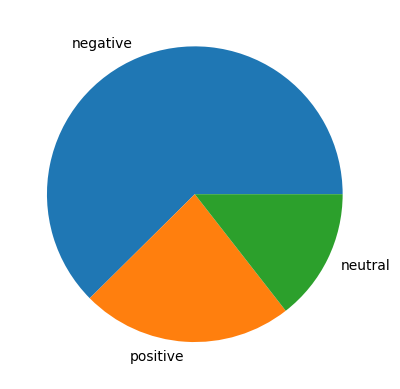

In [106]:
train_df.value_counts('label').plot(kind='pie')

## Data Preprocessing

In [107]:
# Download the emoji library
demoji.download_codes()
lemmatizer = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))
stopwords_id = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = demoji.replace_with_desc(tweet)
    tweet = tweet.lower()
    tweet = lemmatizer.lemmatize(tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords_en]
    tweet = [word for word in tweet if word not in stopwords_id]
    tweet = [stemmer.stem(word) for word in tweet]
    return tweet

# Preprocess the tweets
train_x = [preprocess_tweet(tweet) for tweet in X_train]
test_x = [preprocess_tweet(tweet) for tweet in X_test]

/tmp/ipykernel_2449412/2370996831.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_str = [' '.join(tweet) for tweet in train_x]
X_test_str = [' '.join(tweet) for tweet in test_x]

X_train_features = vectorizer.fit_transform(X_train_str)
X_test_features = vectorizer.transform(X_test_str)

In [109]:
X_train_features

<3521x16048 sparse matrix of type '<class 'numpy.float64'>'
	with 57358 stored elements in Compressed Sparse Row format>

In [110]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_features)

# Evaluate the classifier on the test set
print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Test Set Performance:
              precision    recall  f1-score   support

    negative       0.75      1.00      0.86        52
     neutral       0.00      0.00      0.00         6
    positive       0.00      0.00      0.00        11

    accuracy                           0.75        69
   macro avg       0.25      0.33      0.29        69
weighted avg       0.57      0.75      0.65        69



/home/nara/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nara/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nara/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
